## Load packages

In [1]:
import env
import spacy
nlp = spacy.load('de_core_news_sm')
from spacy import displacy
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
import datetime as dt
import matplotlib.dates as mdates
import json

## Connect to database

In [2]:
conn = sqlite3.connect(env.DB_CLEAN_URL)
cur = conn.cursor()

df = pd.read_sql("SELECT id,Titel,Body,Kategorie,Datum,Quelle FROM Artikel", conn, index_col="id", parse_dates=True)
df.shape
df.head()

,Titel,Body,Kategorie,Datum,Quelle
id,,,,,
133,Alpenverein kontert: Schnee­freie Wander­wege ...,"Wie du mir, so ich dir! Dieses Motto dürfte de...",Allgemein,2019-10-20 00:00:00,Entenpost
134,Porsche war gestern: SPÖ-Funk­tio­nä­re star­t...,"Fragte man zuletzt jemanden, wofür eigentlich ...",Politik,2019-10-15 00:00:00,Entenpost
135,Unfassbar: Wir sind heuer zwei Mal Nobel­preis!,War schon der Literatur-Nobelpreis 2019 für de...,Allgemein,2019-10-13 00:00:00,Entenpost
136,Harry-Potter-Fan Franzis­kus bestätigt: Joanne...,"Gerüchte gab es schon länger, jetzt ist es als...",Allgemein,2019-10-10 00:00:00,Entenpost
137,Praktisch: Mit Jö-Karte statt e-card beim Arzt...,Wer kennt das nicht: Das Portemonnaie ist pral...,"Allgemein, Empfehlung",2019-10-05 00:00:00,Entenpost


In [3]:
df.shape

(132, 5)

## Save as csv

In [4]:
df.to_csv(path_or_buf="./data/news_en.csv", sep=',',encoding='utf-8')

## Count articles per day

In [5]:
artikelliste={}

for i in range(0, len(df)):
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    
    if datum in artikelliste:
        artikelliste[datum] += 1
    else:
        artikelliste[datum] = 1
            

/Users/andreas/anaconda3/envs/Satire/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


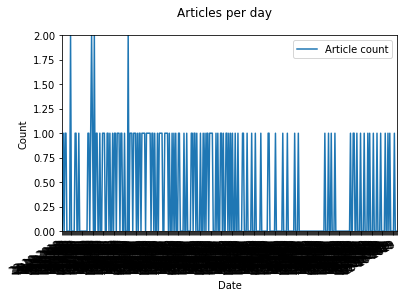

In [6]:
startdatum = "2018-10-22"
enddatum = "2019-10-23"

datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
datelist = pd.to_datetime((datelist))

artikelliste0 =[]
for date in datelist:
    if str(date).split()[0] in artikelliste:
        artikelliste0.append(artikelliste[str(date).split()[0]])
    else:
        artikelliste0.append(0)
        
tickslist = pd.date_range(start=startdatum, end=enddatum, freq='1D').tolist()

plt.plot(datelist, artikelliste0, label="Article count")
plt.axis([startdatum, enddatum, 0, max(artikelliste0)])

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
plt.xlabel('Date')
plt.xticks(tickslist)
plt.ylabel('Count')
plt.suptitle('Articles per day')
plt.gcf().autofmt_xdate()
plt.legend()
plt.savefig('./images/anzahl_en.png', dpi=300)
plt.show()

## Mark persons and organizations

In [7]:
colors = {'ORG': 'red', 'PER':'yellow'}
options = {'ents': ['ORG', 'PER'], 'colors': colors}
for i in range(0, 10):
    titel = df.iloc[i]['Titel']
    body = df.iloc[i]['Body']
    doc = nlp(titel)
    doc.user_data['title'] = 'Persons in titel ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options )

In [8]:
colors = { 'PER':'red'}
options = {'ents': [ 'PER'], 'colors': colors}
for i in range(0, 2):
    body = df.iloc[i]['Body']
    doc = nlp(body)
    doc.user_data['title'] = 'Persons in text ' + str(i)
    displacy.render(doc, style='ent', jupyter=True, options=options)

## Build list of person counts

In [9]:
personenliste=dict()

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PER' and ent.text != "“" and ent.text != "’s":
            if ent.text in personenliste:
                personenliste[ent.text] += 1
            else:
                personenliste[ent.text] = 1

In [10]:
personenliste

{'Alpenverein': 1,
 'Josef Feinzmüller': 1,
 'unisono': 1,
 'Pamela Rendi-Wagner': 5,
 'Tempo': 1,
 'Thomas Drozda': 5,
 'Tirols': 2,
 'Georg Dornauer': 3,
 'Jörg Haider': 1,
 'Wolfgang Schüssel': 1,
 'meines Erachtens': 1,
 'Peter Handke': 1,
 'Joanne K.': 1,
 'Rowling': 1,
 'Franziskus': 11,
 'Joanne K. Rowling': 1,
 'Schrift': 1,
 'Gemetzel': 1,
 'Teufel': 4,
 'Gotteszorn': 1,
 'praktischerweise': 1,
 'Diskonters Hofer': 1,
 'Thomas Szekeres': 2,
 'Szekeres': 2,
 'Billa Reisen': 1,
 'Datenschützer': 1,
 'Comeback': 1,
 'Robert Lugar': 6,
 'Sebastian Kurz': 14,
 'Werner Kogler': 2,
 'Lugar': 2,
 'Delfine': 3,
 'Orang Utans': 2,
 'Apropos Spaß': 1,
 'unsereins': 1,
 'Hermann Nitsch': 3,
 'Djadi Harouni': 1,
 'Harounis': 1,
 'Jahrhunderts': 2,
 'de Sade': 1,
 'Friedrich Nietzsche': 1,
 'Lebensgefahr': 2,
 'Hofer': 5,
 'Norbert Hofer': 6,
 'Männern': 1,
 'Rendi-Wagner': 1,
 'Glücklicherweise': 1,
 'Norbert Hofers Fieberattacke': 1,
 'Peter Pilz': 4,
 'Norbert Hofers': 1,
 'Beate Meinl-R

## Save countlist

In [11]:
import json
json = json.dumps(personenliste)
f = open("./data/personenliste_en.json","w")
f.write(json)
f.close()

## Clean list

In [12]:
def cleandict_en(inputdict):
    
    dict2 = inputdict.copy()
    for key in inputdict.keys(): 
        if key.startswith("\\"):
            del dict2[key]
        if key.strip() == "":
            del dict2[key]
        if key.strip() == "Verwandte ThemenFactbox":
            del dict2[key]
        if key.strip() == "Sgt":
            del dict2[key]
        
    return dict2

In [13]:
personenclean = cleandict_en(personenliste)

## Map personnames together (i.e. "Donald Trump" and "Trump")

In [14]:
def listekompakt(inputdict):
    outputdict = {}

    for name, num in inputdict.items():
        for key in inputdict.keys():            
            if (name == key):
                continue
            if (name in key) and (inputdict[name] > 5):
                inputdict[name] += num
                inputdict[key] = 0
                break
    for name, num  in inputdict.items():
        if num > 0:
            outputdict[name] = num
    return outputdict

In [15]:
personenkompakt = listekompakt(personenclean)

In [16]:
import json
json = json.dumps(personenkompakt)
f = open("./data/personenliste_en_clean.json","w")
f.write(json)
f.close()

## Barchart of sortet counts

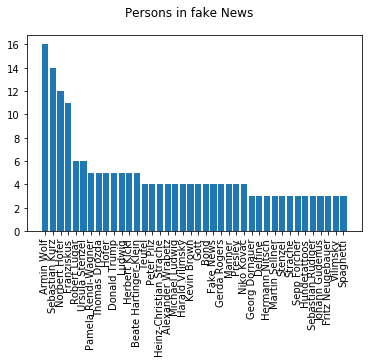

In [17]:
personen = sorted(personenkompakt.items(), key=itemgetter(1),reverse=True)

names = list(zip(*personen))[0][0:40]
values = list(zip(*personen))[1][0:40]
x_pos = np.arange(len(names)) 

plt.xticks(rotation='vertical')
plt.subplots_adjust(bottom=0.2)
plt.bar(x_pos, values)
plt.xticks(x_pos, names) 
plt.suptitle('Persons in fake News')
plt.savefig('./images/hauefigkeit_news_en.png', dpi=300)
plt.show()

## Build list of counts per day

In [18]:
datumliste={}

for i in range(0, len(df)):
    body = df.iloc[i]['Body']
    titel = df.iloc[i]['Titel']
    datum = df.iloc[i]['Datum']
    datum = datum.split(" ")[0]
    doc = doc = nlp(titel + "\n" + body)
    for ent in doc.ents:
        if ent.label_ == 'PER':
            if ent.text in datumliste:
                if datum in datumliste[ent.text]:
                    datumliste[ent.text][datum] += 1
                else:
                    datumliste[ent.text][datum] = 1
            else:
                datumliste[ent.text] = {}
                datumliste[ent.text][datum] = 1

In [19]:
datumliste

{'Alpenverein': {'2019-10-20': 1},
 'Josef Feinzmüller': {'2019-10-20': 1},
 'unisono': {'2019-10-15': 1},
 'Pamela Rendi-Wagner': {'2019-10-15': 2,
  '2019-09-21': 1,
  '2019-05-27': 1,
  '2018-11-23': 1},
 'Tempo': {'2019-10-15': 1},
 'Thomas Drozda': {'2019-10-15': 2, '2018-11-29': 2, '2018-11-23': 1},
 'Tirols': {'2019-10-15': 2},
 'Georg Dornauer': {'2019-10-15': 2, '2018-11-23': 1},
 'Jörg Haider': {'2019-10-15': 1},
 'Wolfgang Schüssel': {'2019-10-15': 1},
 'meines Erachtens': {'2019-10-15': 1},
 '“': {'2019-10-15': 1,
  '2019-03-15': 1,
  '2019-02-14': 1,
  '2019-01-28': 1,
  '2019-01-26': 1,
  '2019-01-25': 1,
  '2019-01-02': 1,
  '2018-12-23': 1,
  '2018-12-11': 1,
  '2018-12-07': 1,
  '2018-11-23': 1,
  '2018-11-05': 1},
 'Peter Handke': {'2019-10-13': 1},
 'Joanne K.': {'2019-10-10': 1},
 'Rowling': {'2019-10-10': 1},
 'Franziskus': {'2019-10-10': 2,
  '2019-09-06': 2,
  '2019-04-20': 1,
  '2018-12-07': 4,
  '2018-10-25': 2},
 'Joanne K. Rowling': {'2019-10-10': 1},
 'Schri

In [20]:
import json
json = json.dumps(datumliste)
f = open("./data/datumliste_en.json","w")
f.write(json)
f.close()

## Map personlists together (i.e. "Donald Trump" and "Trump")

In [21]:
def uniondict(dict1,dict2):
    returndict ={}
    
    allkeys = list(set(list(dict1.keys()) + list(dict2.keys())))
    allvalues = [0] * len(allkeys)
    for i in range(len(allkeys)):
        returndict[allkeys[i]] = allvalues[i]
    
    for key1, value1 in dict1.items():
        returndict[key1] += value1
    for key2, value2 in dict2.items():
        returndict[key2] += value2
                
    return returndict

In [22]:
def datekompakt(inputdict):
    outputdict = {}

    for name, datelist in inputdict.items():
        for key in inputdict.keys():
            if (name == key):
                continue
            if (name in key) and (len(inputdict[name]) > 3):
                inputdict[name] = uniondict(inputdict[key],datelist)
                inputdict[key] = {}
                break
    for name, datelist  in inputdict.items():
        if datelist != {}:      
            outputdict[name] = datelist
    return outputdict

## Clean lists

In [23]:
datumclean= cleandict_en(datumliste)

In [24]:
datumkompakt = datekompakt(datumclean)

In [25]:
import json
json = json.dumps(datumkompakt)
f = open("./data/datumliste_en_clean.json","w")
f.write(json)
f.close()

## Lineplots for persons

In [26]:
def namenplot(name1, name2, startdatum, enddatum, frequenz, savepfad):
    dict1 = datumkompakt[name1]
    dict2 = datumkompakt[name2]

    datelist = pd.date_range(start=startdatum, end=enddatum).tolist()
    datelist = pd.to_datetime((datelist))

    y_name1 =[]
    y_name2 =[]
    for date in datelist:
        if str(date).split()[0] in dict1:
            y_name1.append(dict1[str(date).split()[0]])
        else:
            y_name1.append(0)
        if str(date).split()[0] in dict2:
            y_name2.append(dict2[str(date).split()[0]])
        else:
            y_name2.append(0)

    tickslist = pd.date_range(start=startdatum, end=enddatum, freq=frequenz).tolist()

    plt.plot(datelist, y_name1,label=name1)
    plt.plot(datelist, y_name2,linestyle='--',label=name2)
    max1 = max(y_name1)
    max2 = max(y_name2)
    plt.axis([startdatum, enddatum, 0, max([max1,max2])+3])

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
    plt.xlabel('Date')
    plt.xticks(tickslist)
    plt.ylabel('Frequecy')
    plt.suptitle('Mentions in the news ' + name1 + " and " + name2)
    plt.gcf().autofmt_xdate()
    plt.legend()
    plt.savefig(savepfad, dpi=300)
    plt.show()

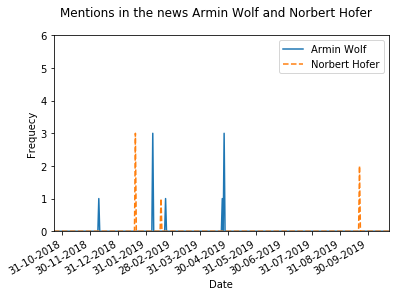

In [31]:
namenplot("Armin Wolf", "Norbert Hofer", startdatum, enddatum, '1M', './images/wolf_hofer.png')